In [118]:
import pickle
import numpy as np

with open("E:\\Face Recognition Project\\AIML project\\clean data\\images.p", "rb") as f:
    images = pickle.load(f)

with open("E:\\Face Recognition Project\\AIML project\\clean data\\labels.p", "rb") as f:
    labels = pickle.load(f)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (200, 100, 100, 1)
Labels shape: (200, 2)


In [119]:
unique_labels = np.unique(labels, axis=0)

In [120]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Example data
original_labels = ['Aniket', 'Anurag', 'Gourav']
le = LabelEncoder()

# Fit the encoder
le.fit(original_labels)

# Encode labels (optional, if not already done)
labels = [le.transform([label]) for label in original_labels]

In [121]:
unique_labels = np.unique(labels, axis=0)


In [122]:
import numpy as np

In [123]:
p = len(set(tuple(label) for label in labels))
print("Number of persons:", p)

a = le.inverse_transform(np.arange(p))
for i in range(len(a)):
    print(i, "--->", a[i])

Number of persons: 3
0 ---> Aniket
1 ---> Anurag
2 ---> Gourav


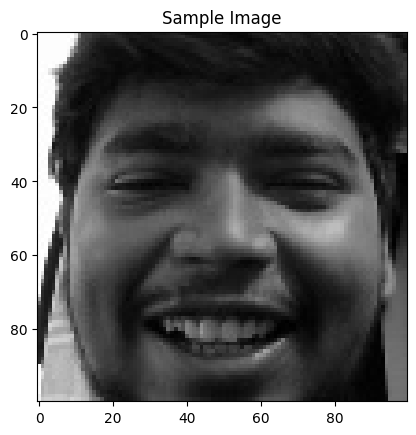

In [124]:
import matplotlib.pyplot as plt
import pickle

# Load images from pickle file
with open("E:\\Face Recognition Project\\AIML project\\clean data\\images.p", "rb") as f:
    images = pickle.load(f)

# Display the first image
plt.imshow(images[0], cmap="gray")
plt.title("Sample Image")
plt.axis("on")  # Optional: hides axis ticks
plt.show()


In [125]:
import cv2

In [126]:
def preprocessing(img):
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    img = cv2.equalizeHist(img)
    img = img.reshape(100, 100, 1)
    return img / 255.0

In [127]:
images = np.array(list(map(preprocessing,images)))
print("Shape of Images:",images.shape)

Shape of Images: (200, 100, 100, 1)


In [128]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [129]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [130]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [131]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

def Lenet_model():
    model = Sequential()
    model.add(Conv2D(30,(5,5),input_shape=(100,100,1),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(15,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(100,activation="relu"))
    model.add(Dense(50,activation="relu"))

    # Output Layer for binary classification (Anurag vs not)
    model.add(Dense(1, activation='sigmoid'))  
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [132]:
model = Lenet_model()
model.summary()

C:\Users\Anurag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 96, 96, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 48, 48, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 46, 46, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 23, 23, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 7935)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │       793,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 803,546 (3.07 MB)

 Trainable params: 803,546 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [133]:
print("Images shape:", np.shape(images))
print("Labels shape:", np.shape(labels))


Images shape: (200, 100, 100, 1)
Labels shape: (3, 3)


In [134]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(100, 100, 1), activation="elu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(30, (5, 5), input_shape=(100, 100, 1), activation="elu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(15, (3, 3), activation="elu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(100, activation="elu"))
model.add(Dropout(0.3))
model.add(Dense(100, activation="elu"))

# Final layer: 2 classes → softmax
model.add(Dense(2, activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Then load your data and train
model.fit(images, labels, epochs=15, validation_split=0.2)

# Save it after training
model.save("E:\\Face Recognition Project\\AIML project\\final_model.h5")


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 160
'y' sizes: 3
